In [1]:
import sklearn
sklearn.__version__

'1.5.1'

In [2]:
from sklearn.datasets import load_digits

mnist = load_digits()


In [3]:
dir(mnist)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
(mnist.target)


array([0, 1, 2, ..., 8, 9, 8])

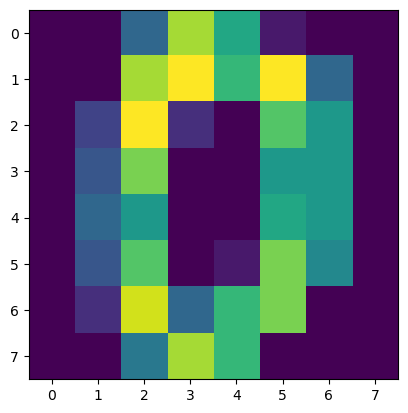

In [5]:
import matplotlib.pyplot as plt
plt.imshow(mnist.images[0])


In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

from sklearn.model_selection import train_test_split

In [16]:
x = torch.FloatTensor(mnist.data)
y = torch.LongTensor(mnist.target)
x_train , x_test , y_train ,y_test = train_test_split(x , y , test_size=0.2, random_state=11)

dataset = TensorDataset(x_train,y_train)

dataloader = DataLoader(dataset,batch_size=32,shuffle=True)



In [22]:
class fun1(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(64,32)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(32,10)
        # self.softmax = nn.Softmax(dim = 10)

    def forward(self,x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.linear2(x)
        # x = self.softmax(x)
        return x

model = fun1()
        

optimizer = optim.Adam(model.parameters() , lr= 0.005)
loss_func = nn.CrossEntropyLoss()
epochs = 15


In [23]:
for epoch in range(epochs+1):
    for batch_idx, samples in enumerate(dataloader):
        
        x =x.float()
        t_true = y_train.long()
        y_true = torch.argmax(t_true,dim=0)

        
        prediction = model(x_train)

        cost = F.cross_entropy(prediction,y_train)

        optimizer.zero_grad()

        cost.backward()

        optimizer.step()
        
        print('Epoch {:4d} Cost: {:.6f}'.format(
            epoch, cost.item()
        ))

Epoch    0 Cost: 3.426354
Epoch    0 Cost: 2.715164
Epoch    0 Cost: 2.400490
Epoch    0 Cost: 2.106102
Epoch    0 Cost: 1.832762
Epoch    0 Cost: 1.618662
Epoch    0 Cost: 1.455839
Epoch    0 Cost: 1.324276
Epoch    0 Cost: 1.194434
Epoch    0 Cost: 1.055030
Epoch    0 Cost: 0.921901
Epoch    0 Cost: 0.812360
Epoch    0 Cost: 0.724352
Epoch    0 Cost: 0.646562
Epoch    0 Cost: 0.574000
Epoch    0 Cost: 0.508112
Epoch    0 Cost: 0.452804
Epoch    0 Cost: 0.410696
Epoch    0 Cost: 0.379542
Epoch    0 Cost: 0.352733
Epoch    0 Cost: 0.327075
Epoch    0 Cost: 0.304042
Epoch    0 Cost: 0.284870
Epoch    0 Cost: 0.268682
Epoch    0 Cost: 0.253366
Epoch    0 Cost: 0.238364
Epoch    0 Cost: 0.225549
Epoch    0 Cost: 0.215315
Epoch    0 Cost: 0.205715
Epoch    0 Cost: 0.195479
Epoch    0 Cost: 0.185819
Epoch    0 Cost: 0.178137
Epoch    0 Cost: 0.171777
Epoch    0 Cost: 0.165414
Epoch    0 Cost: 0.158654
Epoch    0 Cost: 0.152241
Epoch    0 Cost: 0.146874
Epoch    0 Cost: 0.142171
Epoch    0 C

In [30]:
model(x_test[0])
y_test[0]


tensor(0)

In [38]:
import torch.utils


class custom(torch.utils.Dataset):
    def __init__(self,x,y):
        self.x = torch.FloatTensor(mnist.data)
        self.y = torch.FloatTensor(mnist.target)

    def __len__(self):
        return len(self.y)

    def __getitem__(self,index):
        return self.x[index], self.y[index]
    
dataset = custom(mnist.data,mnist.target)

AttributeError: module 'torch.utils' has no attribute 'Dataset'

In [42]:
class fun2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(64,32)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(32,10)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self,x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x

model2 = fun2()

optimizer2 = torch.optim.SGD(model2.parameters(),lr=0.005)

criterion = nn.CrossEntropyLoss()

epoch = 10

for epoch in range(epochs):
    for data,target in dataloader:

        output = model2(data)

        loss = criterion(output,target)

        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()

        if epoch%10 == 0:
            print(epoch,loss)

0 tensor(2.3484, grad_fn=<NllLossBackward0>)
0 tensor(2.3379, grad_fn=<NllLossBackward0>)
0 tensor(2.3181, grad_fn=<NllLossBackward0>)
0 tensor(2.3389, grad_fn=<NllLossBackward0>)
0 tensor(2.3402, grad_fn=<NllLossBackward0>)
0 tensor(2.3526, grad_fn=<NllLossBackward0>)
0 tensor(2.3608, grad_fn=<NllLossBackward0>)
0 tensor(2.3535, grad_fn=<NllLossBackward0>)
0 tensor(2.3345, grad_fn=<NllLossBackward0>)
0 tensor(2.3454, grad_fn=<NllLossBackward0>)
0 tensor(2.3315, grad_fn=<NllLossBackward0>)
0 tensor(2.3315, grad_fn=<NllLossBackward0>)
0 tensor(2.3381, grad_fn=<NllLossBackward0>)
0 tensor(2.3514, grad_fn=<NllLossBackward0>)
0 tensor(2.3345, grad_fn=<NllLossBackward0>)
0 tensor(2.3347, grad_fn=<NllLossBackward0>)
0 tensor(2.3500, grad_fn=<NllLossBackward0>)
0 tensor(2.3187, grad_fn=<NllLossBackward0>)
0 tensor(2.3119, grad_fn=<NllLossBackward0>)
0 tensor(2.3044, grad_fn=<NllLossBackward0>)
0 tensor(2.3343, grad_fn=<NllLossBackward0>)
0 tensor(2.2924, grad_fn=<NllLossBackward0>)
0 tensor(2

In [47]:
x_train,x_test,y_train,y_test = train_test_split(mnist.data,mnist.target,test_size=0.3,random_state=42,stratify=mnist.target)



(1257,)

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import load_digits

mnist = load_digits()

class customDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = torch.FloatTensor(x)
        self.y = torch.LongTensor(y) # 오류
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
train_ds =customDataset(x_train,y_train)
test_ds = customDataset(x_test,y_test)
    
dataset = customDataset(mnist.data, mnist.target)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)


In [51]:
import torch.utils


train_dataloader = torch.utils.data.DataLoader(train_ds,batch_size=32,shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_ds,batch_size=32,shuffle=False)

In [49]:

class customModel(nn.Module):
    def __init__(self):
        super(customModel, self).__init__()
        self.linear1 = nn.Linear(64, 32)
        self.linear2 = nn.Linear(32, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x
    
model = customModel()
print(model)



customModel(
  (linear1): Linear(in_features=64, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
  (relu): ReLU()
)


In [60]:
from sklearn.metrics import accuracy_score

In [65]:
optimizer = torch.optim.SGD(model2.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()
epochs = 10

def train(model,dataloader,optimizer,loss,epochs):
    for epoch in range(epochs):
        for data,target in dataloader:
            y_pred = model2(data)

            loss = loss_func(y_pred.detach().numpy(),target.detach().numpy())

            acc= accuracy_score(target,y_pred.argmax())

            optimizer2.zero_grad()

            loss.backward()

            optimizer2.step()
        
        print(f"epoch :{epoch}, Loss : {loss.item()} , acc : {acc}")


In [66]:
def test(model,dataloader,optimizer,loss,epochs):
    for epoch in range(epochs):
        for data,target in dataloader:
            y_pred = model2(data)

            loss = loss_func(y_pred,target)
        
        print(f"epoch :{epoch}, Loss : {loss.item()}")


In [64]:
train(model2,train_dataloader,optimizer2,criterion,epochs)

TypeError: cross_entropy_loss(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [59]:
test(model2,test_dataloader,optimizer2,criterion,epochs)

epoch :0, Loss : 2.0325779914855957
epoch :1, Loss : 2.0325779914855957
epoch :2, Loss : 2.0325779914855957
epoch :3, Loss : 2.0325779914855957
epoch :4, Loss : 2.0325779914855957
epoch :5, Loss : 2.0325779914855957
epoch :6, Loss : 2.0325779914855957
epoch :7, Loss : 2.0325779914855957
epoch :8, Loss : 2.0325779914855957
epoch :9, Loss : 2.0325779914855957
